# Dogs vs Cats Dataset

One of the most basic level computer vision application is this Dogs vs Cats Datset. We are going to go through each of the titbit and prepare our own model to fetch out a good result. Lets start!

I love importing all the necessary packages in the first cell, so don't be scared by seeing so many imports, its just my habit of doing it.

In [1]:
#Importing the necessary packages

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Flatten , Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil

With all the packages imported lets start with the project.

## Step 1: Importing the dataset

This dataset is unique since it bears normal images of cats and dogs in JPG format.
The training examples are present in the train directory. Each image is named with the class(cat or dog) followed by a '.' then an integer and then a .jpg extension. The training set consists of 25000 images.
We are going to keep aside 5000 images for evaluation. We are going to take 2500 images of dogs and cats each for validation set. 

The test examples are present in the test1 directory.

We are going to first separate out the directories for training and validation and also separate them with respect to their classes.

In [5]:
#Setting the base directory

base_dir = 'D:/Deep_Learning/DogsvsCats/' #setting the path of the base directory

train_dir = os.path.join(base_dir , 'train') #setting the path of the train directory

#Creating the validation direction
val_dir = os.path.join(base_dir , 'val') #setting the path 
os.mkdir(val_dir) # making the directory

test_dir = os.path.join(base_dir , 'test1') #setting the path of the test directory

#Creating dogs directory of the training data
train_dogs = os.path.join(train_dir , 'dogs') #setting path 
os.mkdir(train_dogs) # making the directory

#Creating cats directory of the training data
train_cats = os.path.join(train_dir , 'cats') #setting path
os.mkdir(train_cats) #making the directory

#Creating dogs directory of the validation data
val_dogs = os.path.join(val_dir , 'dogs') #setting path
os.mkdir(val_dogs) #making directory

#Creating cats directory of validation data
val_cats = os.path.join(val_dir , 'cats') #setting path
os.mkdir(val_cats) #making directory

Now we are going to separate out the cats and dogs of the dataset and then split into validation set.

In [28]:
#Copying the cats images into separate folder
fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]

for fname in fnames:
    src = os.path.join(train_dir , fname)
    dst = os.path.join(train_cats , fname)
    shutil.copy(src , dst)

In [29]:
#Copy the images of dogs into separate folder
fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]

for fname in fnames:
    src = os.path.join(train_dir , fname)
    dst = os.path.join(train_dogs , fname)
    shutil.copy(src , dst)

We have split the data based on the clases. Now we split for validation.

I have decided on choosing 2500 cat images and 2500 dog images for validation. Lets do that now!

In [30]:
d_fnames = ['dog.{}.jpg'.format(i) for i in range(10000,12500)]
c_fnames = ['cat.{}.jpg'.format(i) for i in range(10000,12500)]

for d_fname in d_fnames :
    d_src = os.path.join(train_dir , d_fname)
    d_dst = os.path.join(val_dogs , d_fname)
    shutil.copy(d_src , d_dst)
for c_fname in c_fnames:    
    c_src = os.path.join(train_dir , c_fname)
    c_dst = os.path.join(val_cats , c_fname)
    shutil.copy(c_src , c_dst)

Everything is sorted with every directory resembling its own data.

Now its time to process the images.

## Step 2: Data Processing

The data processing for this dataset is very intense, but with the help of the Keras framework it would be handled with ease.

But lets list out the details we want to clarify.

1. Convert the images into floating tensors
2. Flatten them by dividing by 255

We are going to utilize the <code>keras.preprocessing.image</code> package for this purpose.

In [6]:
base_dir = 'D:/Deep_Learning/DogsvsCats/'
train_dir = os.path.join(base_dir , 'train')
val_dir = os.path.join(base_dir , 'val')

train_gen = ImageDataGenerator(rescale = 1./255)
val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = train_gen.flow_from_directory(train_dir,
                                               target_size = (150 , 150),
                                               batch_size = 20,
                                               class_mode = 'binary')
validation_generator = val_gen.flow_from_directory(val_dir,
                                                  target_size = (150 , 150),
                                                  batch_size = 20,
                                                  class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Phew. Just one step and everything is sorted.

Lets move on and model our convnet.

In [7]:
#defining the model function
def get_model(rate):
    
    model = Sequential([
        Conv2D(32 , (3 , 3) , activation = 'relu' , input_shape = (150,150,3)),
        MaxPooling2D((2 , 2)),
        Conv2D(64 , (3 , 3) , activation = 'relu'),
        MaxPooling2D((2 , 2)),
        Conv2D(128 , (3 , 3) , activation = 'relu'),
        MaxPooling2D((2 , 2)),
        Conv2D(128 , (3 , 3) , activation = 'relu'),
        MaxPooling2D((2 , 2)),
        Flatten(),
        BatchNormalization(),
        Dropout(rate),
        Dense(512 , activation = 'relu'),
        BatchNormalization(),
        Dropout(rate),
        Dense(1 , activation = 'sigmoid')
    ])
    
    return model

In [12]:
model = get_model(0.5) #setting the model
model.summary() #setting the model summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       1

Now lets fit the model.

Since we have a generator, we are going to use fit_generator.

In [13]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [17]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 113s 1s/step - loss: 1.0224 - accuracy: 0.5675 - val_loss: 1.1553 - val_accuracy: 0.5060
Epoch 2/30
100/100 [==============================] - 70s 701ms/step - loss: 0.8291 - accuracy: 0.5855 - val_loss: 1.6769 - val_accuracy: 0.5160
Epoch 3/30
100/100 [==============================] - 63s 634ms/step - loss: 0.7720 - accuracy: 0.5870 - val_loss: 0.7199 - val_accuracy: 0.6010
Epoch 4/30
100/100 [==============================] - 61s 605ms/step - loss: 0.7178 - accuracy: 0.6115 - val_loss: 1.2618 - val_accuracy: 0.5010
Epoch 5/30
100/100 [==============================] - 57s 567ms/step - loss: 0.6969 - accuracy: 0.6255 - val_loss: 0.8530 - val_accuracy: 0.6040
Epoch 6/30
100/100 [==============================] - 56s 557ms/step - loss: 0.6538 - accuracy: 0.6375 - val_loss: 0.7080 - val_accuracy: 0.6130
Epoch 7/30
100/100 [==============================] - 49s 489ms/step - loss: 0.6491 - accuracy: 0.6495 - val_loss: 0.7863 - val_accu

Lets plot the learning curves to get a better preview!

In [21]:
df = pd.DataFrame(history.history) # creating a dataset of loss and accuracy
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.022355,0.5675,1.155344,0.506
1,0.829056,0.5855,1.676879,0.516
2,0.771997,0.5870,0.719869,0.601
3,0.717762,0.6115,1.261790,0.501
4,0.696872,0.6255,0.853000,0.604


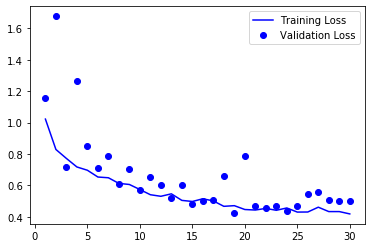

In [23]:
#Plotting the loss curve

loss = df["loss"]
val_loss = df["val_loss"]

epochs = range(1 , len(loss)+1)

plt.plot(epochs , loss , 'b' , label = 'Training Loss')
plt.plot(epochs , val_loss , 'bo' , label = 'Validation Loss')
plt.legend()
plt.show()

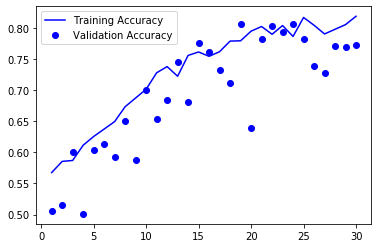

In [24]:
#Plotting the accuracy curve

acc = df["accuracy"]
val_acc = df["val_accuracy"]

epochs = range(1 , len(loss)+1)

plt.plot(epochs , acc , 'b' , label = 'Training Accuracy')
plt.plot(epochs , val_acc , 'bo' , label = 'Validation Accuracy')
plt.legend()
plt.show()

The overfitting is somewhat less due to the dropout and batch normalization layers.

To make the model more efficient, lets try data augmentation.

The <code>ImageDataGenerator</code> will help in doing this. 

In [35]:
new_train_datagen = ImageDataGenerator(rescale = 1./255 , 
                                      rotation_range = 45 , 
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2, 
                                      shear_range = 0.2, 
                                      zoom_range = 0.2,
                                      horizontal_flip = True)

new_val_datagen = ImageDataGenerator(rescale = 1./255) #we dont augment images for validation sets

train_generator = new_train_datagen.flow_from_directory(train_dir,
                                               target_size = (150 , 150),
                                               batch_size = 32,
                                               class_mode = 'binary')
validation_generator = new_val_datagen.flow_from_directory(val_dir,
                                                  target_size = (150 , 150),
                                                  batch_size = 32,
                                                  class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Lets refit and train the model

In [36]:
model = get_model(0.5)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

In [37]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [38]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 100,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 39s 393ms/step - loss: 1.0340 - accuracy: 0.5494 - val_loss: 1.7930 - val_accuracy: 0.4963
Epoch 2/100
100/100 [==============================] - 23s 231ms/step - loss: 0.8492 - accuracy: 0.5394 - val_loss: 1.0123 - val_accuracy: 0.4963
Epoch 3/100
100/100 [==============================] - 25s 247ms/step - loss: 0.7592 - accuracy: 0.5541 - val_loss: 0.7069 - val_accuracy: 0.6131
Epoch 4/100
100/100 [==============================] - 26s 260ms/step - loss: 0.7298 - accuracy: 0.5888 - val_loss: 0.6930 - val_accuracy: 0.6481
Epoch 5/100
100/100 [==============================] - 24s 239ms/step - loss: 0.6929 - accuracy: 0.6009 - val_loss: 0.6604 - val_accuracy: 0.6162
Epoch 6/100
100/100 [==============================] - 24s 239ms/step - loss: 0.6650 - accuracy: 0.6247 - val_loss: 0.7098 - val_accuracy: 0.5900
Epoch 7/100
100/100 [==============================] - 24s 239ms/step - loss: 0.6687 - accuracy: 0.6197 - val_loss: 0.6146 -

Epoch 57/100
100/100 [==============================] - 27s 270ms/step - loss: 0.3945 - accuracy: 0.8138 - val_loss: 0.3015 - val_accuracy: 0.8788
Epoch 58/100
100/100 [==============================] - 27s 266ms/step - loss: 0.4048 - accuracy: 0.8150 - val_loss: 0.3192 - val_accuracy: 0.8731
Epoch 59/100
100/100 [==============================] - 27s 269ms/step - loss: 0.4045 - accuracy: 0.8112 - val_loss: 0.2833 - val_accuracy: 0.8825
Epoch 60/100
100/100 [==============================] - 27s 268ms/step - loss: 0.4013 - accuracy: 0.8206 - val_loss: 0.6815 - val_accuracy: 0.7419
Epoch 61/100
100/100 [==============================] - 27s 269ms/step - loss: 0.4065 - accuracy: 0.8203 - val_loss: 0.4375 - val_accuracy: 0.7912
Epoch 62/100
100/100 [==============================] - 27s 268ms/step - loss: 0.3705 - accuracy: 0.8400 - val_loss: 0.5227 - val_accuracy: 0.7312
Epoch 63/100
100/100 [==============================] - 26s 261ms/step - loss: 0.3767 - accuracy: 0.8319 - val_loss: 0

In [39]:
df = pd.DataFrame(history.history) # creating a dataset of loss and accuracy
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.034026,0.549375,1.792985,0.496250
1,0.849200,0.539375,1.012251,0.496250
2,0.759249,0.554062,0.706912,0.613125
3,0.729850,0.588750,0.693037,0.648125
4,0.692940,0.600937,0.660388,0.616250


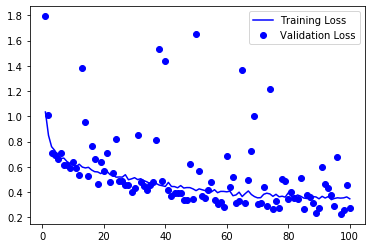

In [40]:
#Plotting the loss curve

loss = df["loss"]
val_loss = df["val_loss"]

epochs = range(1 , len(loss)+1)

plt.plot(epochs , loss , 'b' , label = 'Training Loss')
plt.plot(epochs , val_loss , 'bo' , label = 'Validation Loss')
plt.legend()
plt.show()

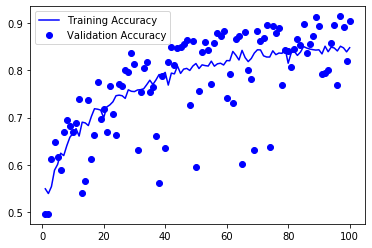

In [41]:
#Plotting the accuracy curve

acc = df["accuracy"]
val_acc = df["val_accuracy"]

epochs = range(1 , len(loss)+1)

plt.plot(epochs , acc , 'b' , label = 'Training Accuracy')
plt.plot(epochs , val_acc , 'bo' , label = 'Validation Accuracy')
plt.legend()
plt.show()

Boom. We achieved a validation accuracy of 90% and a training accuracy of 84%.